# Mass shootings in US Data Anaylsis (2016-2020)

### Objectives

• Visualize mass shootings on the U.S map

• Is there any correlation between shooting and month of the year

• Any correlation with calendar dates? Do we have more deadly months on average

• What cities and states are more prone to such attacks


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv("Mass shooting data.csv")
data.head()

,Incident ID,Incident Date,State,City Or County,Address,# Killed,# Injured,Operations
0,1978561,"April 15, 2021",District of Columbia,Washington,1800 block of West Virginia Ave NE,0,4,NaN
1,1978635,"April 15, 2021",Indiana,Indianapolis,8951 Mirabel Rd,8,5,NaN
2,1978652,"April 15, 2021",Illinois,Chicago,600 block of N Sawyer Ave,0,4,NaN
3,1978616,"April 15, 2021",Florida,Pensacola,700 Truman Ave,0,6,NaN
4,1976538,"April 13, 2021",Maryland,Baltimore,2300 block of Hoffman St,0,4,NaN


In [3]:
data.tail()

,Incident ID,Incident Date,State,City Or County,Address,# Killed,# Injured,Operations
1995,634238,"August 20, 2016",Connecticut,Hamden,903 Dixwell Ave,0,4,NaN
1996,634731,"August 20, 2016",Washington,Tacoma,900 block of Pacific Avenue,0,5,NaN
1997,634819,"August 20, 2016",Alabama,Citronelle,Jim Platt Road,5,0,NaN
1998,632747,"August 18, 2016",Connecticut,Waterbury,402 E Main Street,0,4,NaN
1999,632753,"August 17, 2016",California,Oakland,Mandela Parkway,0,4,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Incident ID     2000 non-null   int64  
 1   Incident Date   2000 non-null   object 
 2   State           2000 non-null   object 
 3   City Or County  2000 non-null   object 
 4   Address         1997 non-null   object 
 5   # Killed        2000 non-null   int64  
 6   # Injured       2000 non-null   int64  
 7   Operations      0 non-null      float64
dtypes: float64(1), int64(3), object(4)
memory usage: 125.1+ KB


In [5]:
data.shape

(2000, 8)

## Data Cleaning

In [6]:
data.isnull().sum()

Incident ID          0
Incident Date        0
State                0
City Or County       0
Address              3
# Killed             0
# Injured            0
Operations        2000
dtype: int64

In [7]:
print(f"There are {len(data[data.duplicated()])} duplicates")

There are 0 duplicates


#### Date Column

In [8]:
# Convert date column to datetime
data["Incident Date"] = pd.to_datetime(data["Incident Date"])

In [27]:
# create year colum

data["Incident Year"] = data["Incident Date"].dt.year

# Create Incident month column
data["Incident Month"] = data["Incident Date"].dt.month

#### Address Column

In [10]:
#View null rows

data[data["Address"].isnull()]

,Incident ID,Incident Date,State,City Or County,Address,# Killed,# Injured,Operations,Incident Year
492,1725735,2020-07-04,South Carolina,Red Oak,NaN,0,5,NaN,2020
1262,1206476,2018-09-09,Florida,Jacksonville,NaN,0,4,NaN,2018
1883,716001,2016-12-01,California,Clearlake Oaks,NaN,1,3,NaN,2016


In [11]:
# drop null rows
data = data.dropna(subset=["Address"])

In [12]:
# create a full address column
data["City_State"] = data["City Or County"] + ", " + data["State"]

In [13]:
# view null values
data.isnull().sum()

Incident ID          0
Incident Date        0
State                0
City Or County       0
Address              0
# Killed             0
# Injured            0
Operations        1997
Incident Year        0
City_State           0
dtype: int64

#### Operation Column

In [14]:
# Drop 'Operations Column'
data = data.drop("Operations", axis =1)

## Feature Engineering

In [15]:
data.head()

,Incident ID,Incident Date,State,City Or County,Address,# Killed,# Injured,Incident Year,City_State
0,1978561,2021-04-15,District of Columbia,Washington,1800 block of West Virginia Ave NE,0,4,2021,"Washington, District of Columbia"
1,1978635,2021-04-15,Indiana,Indianapolis,8951 Mirabel Rd,8,5,2021,"Indianapolis, Indiana"
2,1978652,2021-04-15,Illinois,Chicago,600 block of N Sawyer Ave,0,4,2021,"Chicago, Illinois"
3,1978616,2021-04-15,Florida,Pensacola,700 Truman Ave,0,6,2021,"Pensacola, Florida"
4,1976538,2021-04-13,Maryland,Baltimore,2300 block of Hoffman St,0,4,2021,"Baltimore, Maryland"


In [17]:
# Create longtitude and latitude columns
import geocoder
import requests


with requests.Session() as session:
    for location in data["City_State"]:
        coo = geocoder.osm(location, session=session)
        if coo:
            data.loc[data["City_State"] == location, "Long"] = round(coo.osm["x"], 6)
            data.loc[data["City_State"] == location, "Lat"] = round(coo.osm["y"], 6)

data.head()

Status code 502 from https://nominatim.openstreetmap.org/search: ERROR - 502 Server Error: Bad Gateway for url: https://nominatim.openstreetmap.org/search?q=Lagrange%2C+Georgia&format=jsonv2&addressdetails=1&limit=1


,Incident ID,Incident Date,State,City Or County,Address,# Killed,# Injured,Incident Year,City_State,Long,Lat
0,1978561,2021-04-15,District of Columbia,Washington,1800 block of West Virginia Ave NE,0,4,2021,"Washington, District of Columbia",-77.036543,38.895037
1,1978635,2021-04-15,Indiana,Indianapolis,8951 Mirabel Rd,8,5,2021,"Indianapolis, Indiana",-86.158350,39.768333
2,1978652,2021-04-15,Illinois,Chicago,600 block of N Sawyer Ave,0,4,2021,"Chicago, Illinois",-87.624421,41.875562
3,1978616,2021-04-15,Florida,Pensacola,700 Truman Ave,0,6,2021,"Pensacola, Florida",-87.216915,30.421309
4,1976538,2021-04-13,Maryland,Baltimore,2300 block of Hoffman St,0,4,2021,"Baltimore, Maryland",-76.610759,39.290882


In [18]:
data.isnull().sum()

Incident ID        0
Incident Date      0
State              0
City Or County     0
Address            0
# Killed           0
# Injured          0
Incident Year      0
City_State         0
Long              14
Lat               14
dtype: int64

In [19]:
data = data.dropna()

## EDA

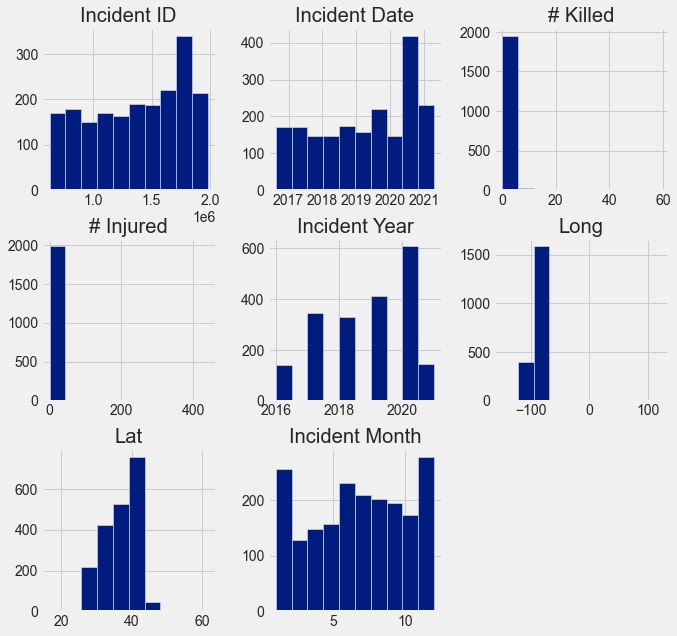

In [65]:
data.hist(figsize=(10,10))
plt.show()

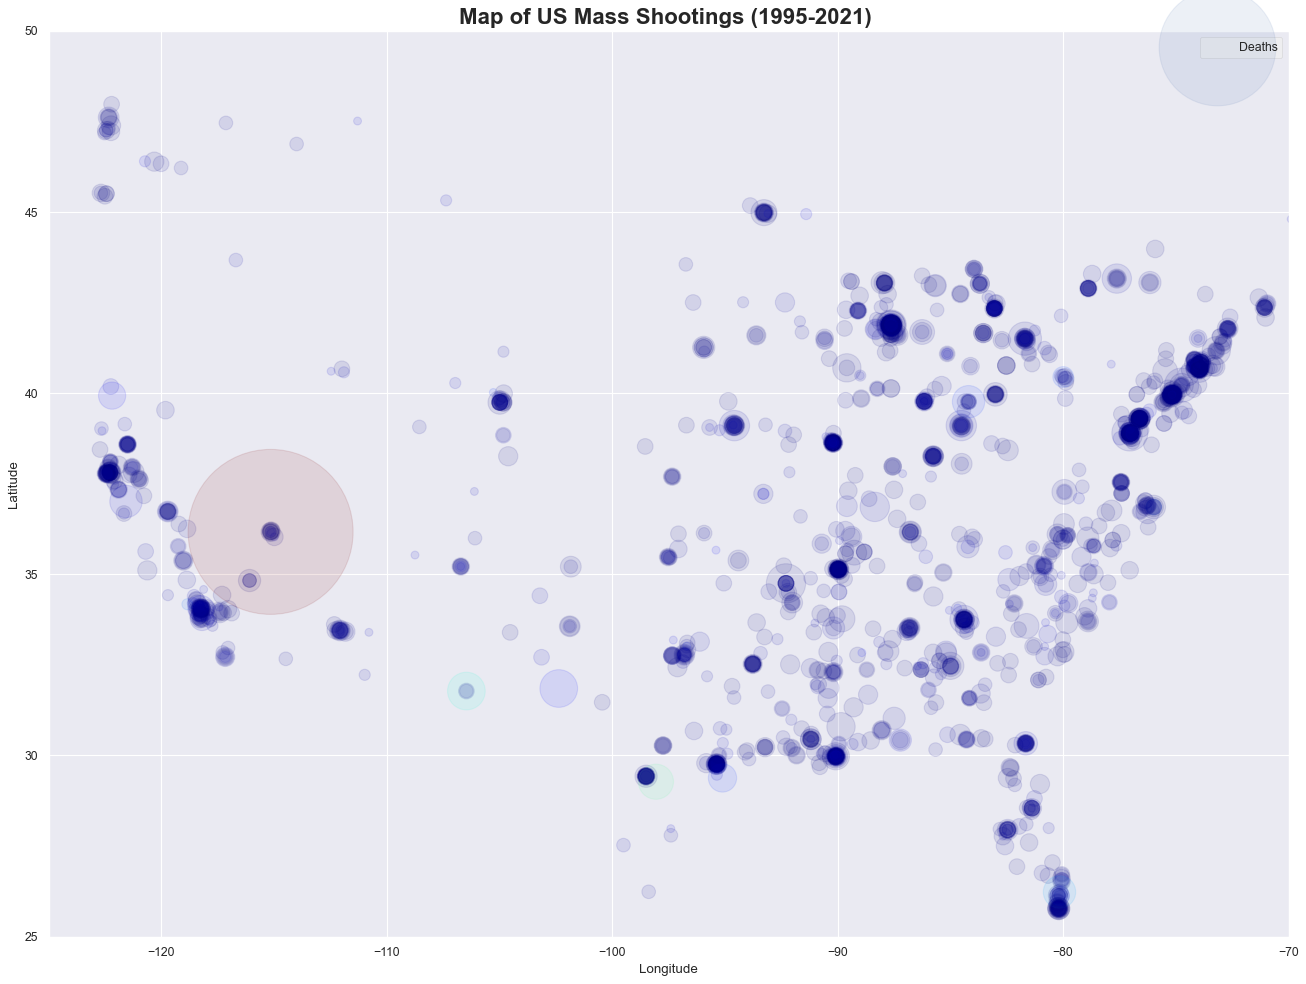

In [20]:

plt.figure(figsize=(20,15), dpi=80)
plt.scatter(data["Long"], 
            data["Lat"],
            alpha=0.1,
            s= data["# Injured"]*50,
            c= data["# Killed"],
            cmap= plt.get_cmap("jet"))
plt.title("Map of US Mass Shootings (1995-2021) ", fontsize=20, weight= "bold")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.style.use("fivethirtyeight")
plt.xlim(-125,-70)
plt.ylim(25, 50)
plt.rc('xtick', labelsize=30) 
plt.rc('ytick', labelsize=30) 
plt.legend(["Deaths"])
plt.show()

In [28]:
data.head(1)

,Incident ID,Incident Date,State,City Or County,Address,# Killed,# Injured,Incident Year,City_State,Long,Lat,Incident Month
0,1978561,2021-04-15,District of Columbia,Washington,1800 block of West Virginia Ave NE,0,4,2021,"Washington, District of Columbia",-77.036543,38.895037,4


In [35]:
# View frequency of Incident for a given month
data.groupby("Incident Month")["Incident ID"].count()

Incident Month
1     139
2     118
3     128
4     149
5     158
6     232
7     210
8     203
9     195
10    173
11    162
12    116
Name: Incident ID, dtype: int64

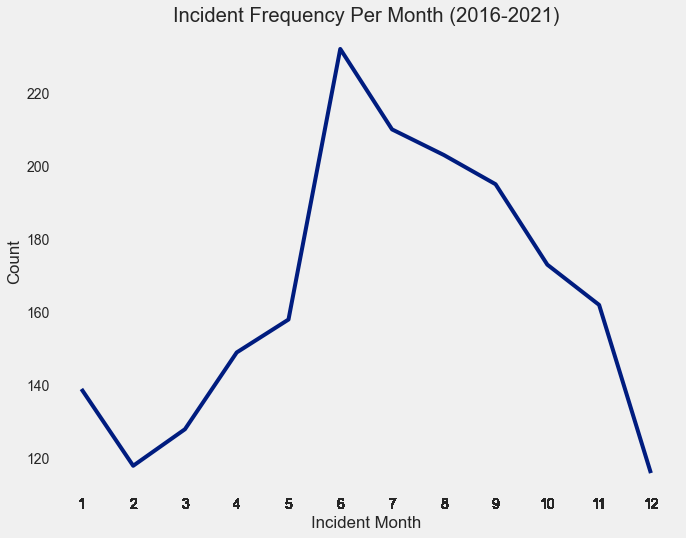

In [83]:
data.groupby("Incident Month")["Incident ID"].count().plot(kind="line", figsize=(10,8))

plt.title("Incident Frequency Per Month (2016-2021)")
plt.ylabel("Count")
plt.xticks(data["Incident Month"])
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14)
plt.style.use("seaborn-dark-palette")
plt.grid(None)
plt.show()

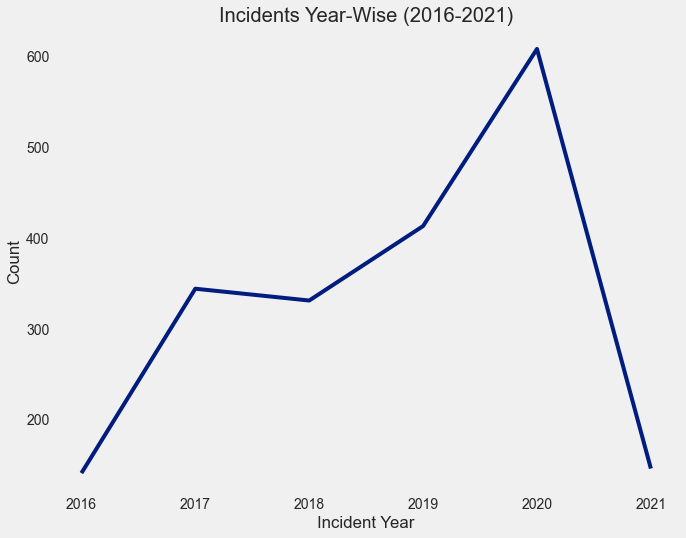

In [82]:
data.groupby("Incident Year")["Incident ID"].count().plot(kind="line", figsize=(10,8))

plt.title("Incidents Year-Wise (2016-2021)")
plt.ylabel("Count")
plt.style.use("seaborn-dark-palette")
plt.grid(None)
plt.show()
plt.show()


In [67]:
data.columns

Index(['Incident ID', 'Incident Date', 'State', 'City Or County', 'Address',
       '# Killed', '# Injured', 'Incident Year', 'City_State', 'Long', 'Lat',
       'Incident Month'],
      dtype='object')

(6.5, -0.5)

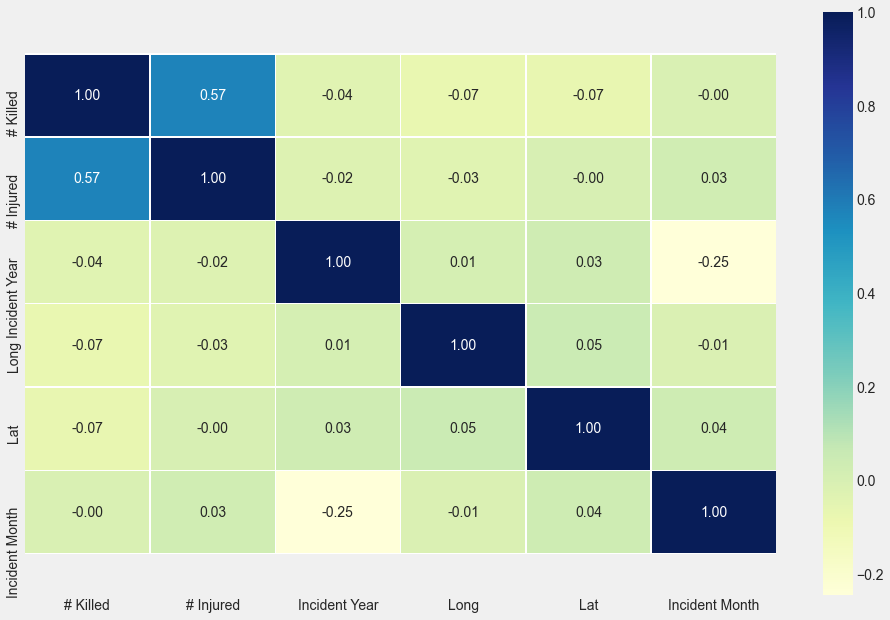

In [68]:
import seaborn as sns
corr_matrix= data[['State', 'City Or County', 'Address',
       '# Killed', '# Injured', 'Incident Year', 'City_State', 'Long', 'Lat',
       'Incident Month']].corr()


fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [71]:
# Correllation of Fatalitites with dataset

corr_matrix["# Killed"] * 100

# Killed          100.000000
# Injured          57.370961
Incident Year      -3.570562
Long               -7.265882
Lat                -7.067036
Incident Month     -0.484458
Name: # Killed, dtype: float64

## Conlusion

We can conclude summer months have the highest occurrences of active shooter incidents in densely populated areas of the country. The likely hood of these incidents is higher on the east coast than on the west coast. But we have to remember this is only based on data from 2016 to 2020. 